In [6]:
import numpy as np
import pandas as pd
import yfinance as yf  # Import yfinance
import datetime

# Define your portfolio tickers and weights
tickers = ['AAPL', 'MSFT', 'GOOGL']
weights = [0.4, 0.4, 0.2]

# Define the date for analysis
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Fetch historical data using yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate portfolio returns
portfolio_returns = np.dot(returns, weights)

# Define parameters for Monte Carlo simulation
num_simulations = 10000
simulation_years = 1
trading_days_per_year = 252
initial_investment = 100000  # Initial portfolio value

# Perform Monte Carlo simulation
simulated_returns = []
for _ in range(num_simulations):
    # Initialize an array to store random returns for each stock
    random_stock_returns = np.zeros(len(tickers))
    
    # Sample random returns for each stock separately
    for i, ticker in enumerate(tickers):
        random_stock_returns[i] = np.random.choice(returns[ticker], size=(trading_days_per_year * simulation_years,))
    
    # Calculate the simulated portfolio returns using the sampled returns for each stock
    simulated_portfolio_returns = np.dot(random_stock_returns, weights)
    simulated_returns.append(simulated_portfolio_returns)
        
# Calculate the probability of breakeven and profit
final_portfolio_values = initial_investment * (1 + np.array(simulated_returns)).cumprod()
probability_breakeven = np.mean(final_portfolio_values >= initial_investment)
probability_profit = np.mean(final_portfolio_values > initial_investment)

print(f"Probability of Breakeven: {probability_breakeven:.2%}")
print(f"Probability of Profit: {probability_profit:.2%}")


[*********************100%***********************]  3 of 3 completed


ValueError: setting an array element with a sequence.

In [44]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf


# Define your portfolio tickers and weights
tickers = ['AAPL', 'MSFT', 'GOOGL']
weights = [0.4, 0.4, 0.2]

# Define the date for analysis
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
data = yf.download(tickers, start=start_date, end=end_date)['Open']


[*********************100%***********************]  3 of 3 completed


In [45]:
# Calculate the portfolio price dynamically without knowing column names
data['Portfolio_Price'] = (data.iloc[:, :].values.dot(weights))
data

,AAPL,GOOGL,MSFT,Portfolio_Price
Date,,,,
1999-12-31,0.901228,NaN,58.750000,NaN
2000-01-03,0.936384,NaN,58.687500,NaN
2000-01-04,0.966518,NaN,56.781250,NaN
2000-01-05,0.926339,NaN,55.562500,NaN
2000-01-06,0.947545,NaN,56.093750,NaN
...,...,...,...,...
2022-12-23,130.919998,87.110001,236.110001,134.434000
2022-12-27,131.380005,88.800003,238.699997,135.812003
2022-12-28,129.669998,86.980003,236.889999,134.038000


In [46]:
# Assuming you have a DataFrame with a hierarchical column index named df

# Reset the index to make Date a regular column
data.reset_index(inplace=True)

# Display the DataFrame with flattened column headers
print(data)


           Date        AAPL      GOOGL        MSFT  Portfolio_Price
0    1999-12-31    0.901228        NaN   58.750000              NaN
1    2000-01-03    0.936384        NaN   58.687500              NaN
2    2000-01-04    0.966518        NaN   56.781250              NaN
3    2000-01-05    0.926339        NaN   55.562500              NaN
4    2000-01-06    0.947545        NaN   56.093750              NaN
...         ...         ...        ...         ...              ...
5783 2022-12-23  130.919998  87.110001  236.110001       134.434000
5784 2022-12-27  131.380005  88.800003  238.699997       135.812003
5785 2022-12-28  129.669998  86.980003  236.889999       134.038000
5786 2022-12-29  127.989998  86.620003  235.649994       132.973999
5787 2022-12-30  128.410004  86.980003  238.210007       133.798004

[5788 rows x 5 columns]


In [47]:
# Create a new DataFrame with only 'Date' and 'Portfolio_Price' columns
new_df = data[['Portfolio_Price']]

# Display the new DataFrame
print(new_df)

      Portfolio_Price
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
...               ...
5783       134.434000
5784       135.812003
5785       134.038000
5786       132.973999
5787       133.798004

[5788 rows x 1 columns]


C:\Users\Qing Rui\AppData\Local\Temp\ipykernel_11460\2633140385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=data.index[-1],axis=0,inplace=True) #delete last row (current day)
C:\Users\Qing Rui\AppData\Local\Temp\ipykernel_11460\2633140385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


      Portfolio_Price
1                 NaN
2                 NaN
3                 NaN
4                 NaN
5                 NaN
...               ...
5782       137.256003
5783       134.434000
5784       135.812003
5785       134.038000
5786       132.973999

[5786 rows x 1 columns]


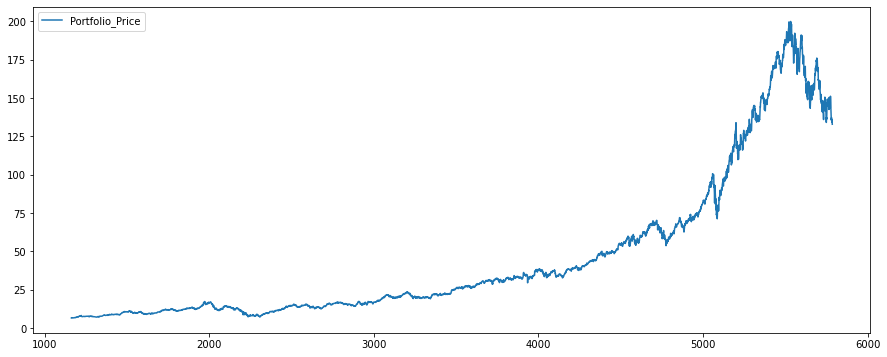

In [51]:
data = new_df
data = data.iloc[1: , :] #delete first row (day before)
data.drop(index=data.index[-1],axis=0,inplace=True) #delete last row (current day)

print(data)
data.plot(figsize=(15,6))

# Drop rows with missing values (NaN)
data.dropna(inplace=True)

In [52]:
def log_returns(data):
    return (np.log(1+data.pct_change()))
#Example use
log_return = log_returns(data)

def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    
    try:
        return drift.values
    except:
        return drift
#Example use
drift_calc(data)

array([0.00052783])

In [53]:
def log_returns(data):
    return (np.log(1+data.pct_change()))
#Example use
log_return = log_returns(data)

def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    
    try:
        return drift.values
    except:
        return drift
#Example use
drift_calc(data)

def daily_returns(data, days, iterations):
    ft = drift_calc(data)
    try:
        stv = log_returns(data).std().values
    except:
        stv = log_returns(data).std()
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr

days = 1000 +1 #user to key in days input
iterations = 10000 #user to key in simulation input

#Example use
daily_returns(data, days, iterations)

def probs_find(predicted, higherthan, on = 'value'):
    if on == 'return':
        predicted0 = predicted.iloc[0,0]
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
        less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
    elif on == 'value':
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [i for i in predList if i >= higherthan]
        less = [i for i in predList if i < higherthan]
    else:
        print("'on' must be either value or return")
    return (len(over)/(len(over)+len(less)))
#Example use (probability our investment will return at least 20% over the days specified in our prediction
probs_find(data, 0.2, on = 'return')

1.0

In [54]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol



def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

print(sharpe_ratio(log_return, 2.85, 10))
print(annualize_rets(log_return,10))
print(annualize_vol(log_return,10))

Portfolio_Price   -16.181705
dtype: float64
Portfolio_Price    0.005285
dtype: float64
Portfolio_Price    0.048712
dtype: float64


c:\Users\Qing Rui\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Qing Rui\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


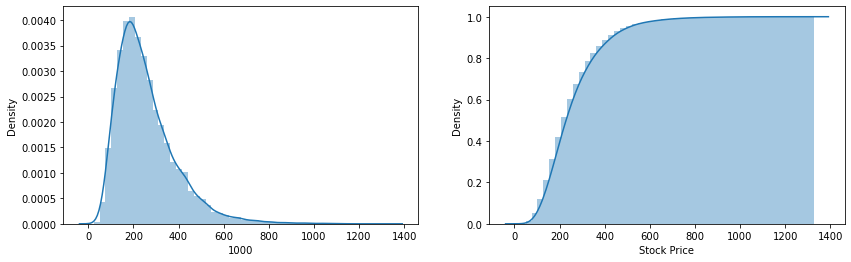

Portfolio_Price
Days: 1000
Expected Value: $257.05
Return: 48.27%
Probability of Breakeven: 0.8644


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,...,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999,132.973999
1,133.603548,129.448122,132.559615,135.778316,134.025106,133.126065,130.682033,137.852101,131.430240,132.978845,...,128.215066,128.933153,139.105458,131.330769,133.888289,128.515117,130.502173,129.741049,132.429120,132.490583
2,131.917279,129.387432,132.289679,134.048107,132.175037,132.262962,134.647577,137.849427,134.184649,133.293907,...,132.405472,128.128152,141.258169,129.364242,134.844445,129.225509,129.577066,129.137680,135.756224,134.257816
3,132.012685,127.504686,134.231643,139.236157,133.249753,134.336847,133.231974,136.486289,131.741712,131.871416,...,132.346840,126.979540,140.823504,130.928581,133.954468,132.210150,127.834988,132.751827,136.924867,133.508761
4,129.281385,125.076701,130.299463,140.015509,131.818274,130.615027,131.882345,135.943784,130.994353,133.852846,...,133.961942,126.579716,141.449240,126.100973,134.588334,132.700554,127.086183,129.743848,139.989946,132.762486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,113.377081,106.598957,294.804602,221.487025,383.613165,143.588541,226.369027,230.172485,54.009672,185.062578,...,178.698399,372.373036,80.397926,550.656989,421.849524,303.902556,250.274983,94.008437,227.178149,104.683467
997,111.693978,105.756892,292.515246,223.631502,378.897443,140.465655,226.799470,231.359172,53.561714,184.605537,...,176.240047,363.691302,81.245982,551.592556,422.627608,292.492529,246.278702,95.406416,223.679753,105.027281
998,111.171384,105.467312,295.676966,225.026810,379.621282,140.110622,224.487400,233.283326,52.899092,184.840872,...,177.086578,369.045288,80.161685,540.227416,426.293621,287.134096,250.977219,95.924687,220.543616,106.018296
999,108.580904,105.770837,287.441386,223.979325,379.457061,145.836115,227.556850,230.799778,52.722977,185.410747,...,179.059592,364.768440,80.614889,540.523209,423.012222,297.706370,246.175843,97.296711,224.433541,106.720552


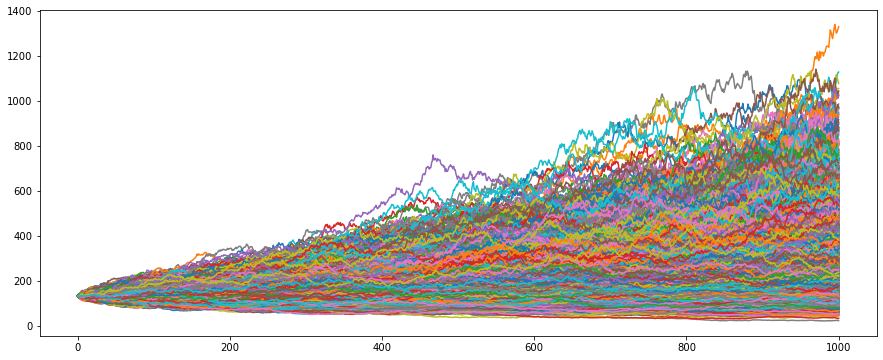

In [55]:
def simulate_mc(data, days, iterations, plot=True):
    # Generate daily returns
    returns = daily_returns(data, days, iterations)
    # Create empty matrix
    price_list = np.zeros_like(returns)
    # Put the last actual price in the first row of matrix. 
    price_list[0] = data.iloc[-1]
    # Calculate the price of each day
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    
    # Plot Option
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    
    #CAPM and Sharpe Ratio
    
    # Printing information about stock
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
   
    plt.figure(figsize=(15,6))
    plt.plot(pd.DataFrame(price_list).iloc[:,0:iterations]) #change upper limit of simulation here
    return pd.DataFrame(price_list)

# days = int(input("number of days: ")) +1 #user to key in days input
# iterations = int(input("number of simulations: ")) #user to key in simulation input

#Example use
simulate_mc(data, days, iterations)

[*********************100%***********************]  3 of 3 completed


C:\Users\Qing Rui\AppData\Local\Temp\ipykernel_11460\213957337.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=data.index[-1],axis=0,inplace=True) #delete last row (current day)
C:\Users\Qing Rui\AppData\Local\Temp\ipykernel_11460\213957337.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
c:\Users\Qing Rui\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (a

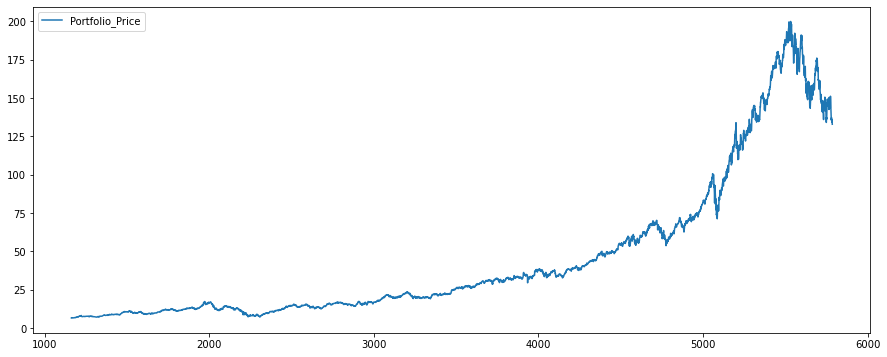

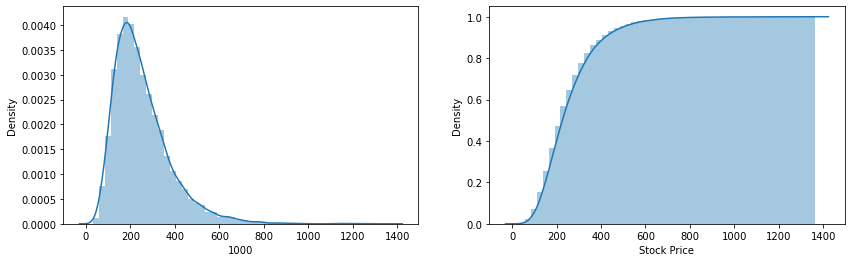

Portfolio_Price
Days: 1000
Expected Value: $252.13
Return: 47.26%
Probability of Breakeven: 0.8644


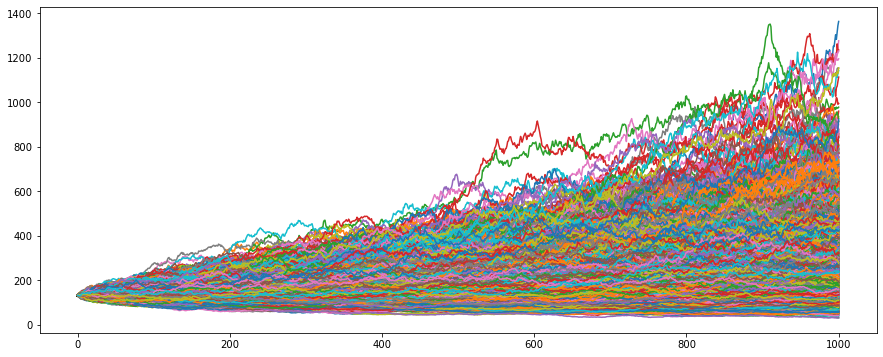

In [58]:
import yfinance as yf

# Define your portfolio tickers and weights
tickers = ['AAPL', 'MSFT', 'GOOGL']
weights = [0.4, 0.4, 0.2]

# Define the date for analysis
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
data = yf.download(tickers, start=start_date, end=end_date)['Open']

# Calculate the portfolio price dynamically without knowing column names
data['Portfolio_Price'] = (data.iloc[:, :].values.dot(weights))

# Reset the index to make Date a regular column
data.reset_index(inplace=True)

# Create a new DataFrame with only 'Date' and 'Portfolio_Price' columns
new_df = data[['Portfolio_Price']]
data = new_df
data = data.iloc[1: , :] #delete first row (day before)
data.drop(index=data.index[-1],axis=0,inplace=True) #delete last row (current day)

data.plot(figsize=(15,6))

# Drop rows with missing values (NaN)
data.dropna(inplace=True)

def log_returns(data):
    return (np.log(1+data.pct_change()))
#Example use
log_return = log_returns(data)

def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u-(0.5*var)
    
    try:
        return drift.values
    except:
        return drift
#Example use
drift_calc(data)

def daily_returns(data, days, iterations):
    ft = drift_calc(data)
    try:
        stv = log_returns(data).std().values
    except:
        stv = log_returns(data).std()
    dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
    return dr

days = 1000 +1 #user to key in days input
iterations = 10000 #user to key in simulation input

#Example use
daily_returns(data, days, iterations)

def probs_find(predicted, higherthan, on = 'value'):
    if on == 'return':
        predicted0 = predicted.iloc[0,0]
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
        less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
    elif on == 'value':
        predicted = predicted.iloc[-1]
        predList = list(predicted)
        over = [i for i in predList if i >= higherthan]
        less = [i for i in predList if i < higherthan]
    else:
        print("'on' must be either value or return")
    return (len(over)/(len(over)+len(less)))
#Example use (probability our investment will return at least 20% over the days specified in our prediction
probs_find(data, 0.2, on = 'return')


def simulate_mc(data, days, iterations, plot=True):
    # Generate daily returns
    returns = daily_returns(data, days, iterations)
    # Create empty matrix
    price_list = np.zeros_like(returns)
    # Put the last actual price in the first row of matrix. 
    price_list[0] = data.iloc[-1]
    # Calculate the price of each day
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    
    # Plot Option
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    
    #CAPM and Sharpe Ratio
    
    # Printing information about stock
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
   
    plt.figure(figsize=(15,6))
    plt.plot(pd.DataFrame(price_list).iloc[:,0:iterations]) #change upper limit of simulation here
    return None

#Example use
simulate_mc(data, days, iterations)

In [10]:
import yfinance as yf
from scipy.stats import norm

# Define your portfolio tickers and weights
tickers = ['AAPL', 'MSFT', 'GOOGL']
weights = [0.4, 0.4, 0.2]

# Define the date for analysis
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

def dataPrep(tickers, weights, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Open']
    # Calculate the portfolio price dynamically without knowing column names
    data['Portfolio_Price'] = (data.iloc[:, :].values.dot(weights))

    # Reset the index to make Date a regular column
    data.reset_index(inplace=True)

    # Create a new DataFrame with only 'Date' and 'Portfolio_Price' columns
    new_df = data[['Portfolio_Price']]
    data = new_df
    data = data.iloc[1: , :] #delete first row (day before)
    data.drop(index=data.index[-1],axis=0,inplace=True) #delete last row (current day)

    # data.plot(figsize=(15,6))

    # Drop rows with missing values (NaN)
    data.dropna(inplace=True)
    return data

data = dataPrep(tickers, weights, start_date, end_date)


def simulate_mc(data, days, iterations, plot=True):

    def log_returns(data):
        return (np.log(1+data.pct_change()))
    #Example use
    log_return = log_returns(data)

    def drift_calc(data):
        lr = log_returns(data)
        u = lr.mean()
        var = lr.var()
        drift = u-(0.5*var)
        
        try:
            return drift.values
        except:
            return drift
    #Example use
    drift_calc(data)

    def daily_returns(data, days, iterations):
        ft = drift_calc(data)
        try:
            stv = log_returns(data).std().values
        except:
            stv = log_returns(data).std()
        dr = np.exp(ft + stv * norm.ppf(np.random.rand(days, iterations)))
        return dr

    days = 1000 +1 #user to key in days input
    iterations = 10000 #user to key in simulation input

    #Example use
    daily_returns(data, days, iterations)

    def probs_find(predicted, higherthan, on = 'value'):
        if on == 'return':
            predicted0 = predicted.iloc[0,0]
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 >= higherthan]
            less = [(i*100)/predicted0 for i in predList if ((i-predicted0)*100)/predicted0 < higherthan]
        elif on == 'value':
            predicted = predicted.iloc[-1]
            predList = list(predicted)
            over = [i for i in predList if i >= higherthan]
            less = [i for i in predList if i < higherthan]
        else:
            print("'on' must be either value or return")
        return (len(over)/(len(over)+len(less)))

    #Example use (probability our investment will return at least 20% over the days specified in our prediction
    probs_find(data, 0.2, on = 'return')
    # Generate daily returns
    returns = daily_returns(data, days, iterations)
    # Create empty matrix
    price_list = np.zeros_like(returns)
    # Put the last actual price in the first row of matrix. 
    price_list[0] = data.iloc[-1]
    # Calculate the price of each day
    for t in range(1,days):
        price_list[t] = price_list[t-1]*returns[t]
    
    # Plot Option
    if plot == True:
        x = pd.DataFrame(price_list).iloc[-1]
        fig, ax = plt.subplots(1,2, figsize=(14,4))
        sns.distplot(x, ax=ax[0])
        sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
        plt.xlabel("Stock Price")
        plt.show()
    
    #CAPM and Sharpe Ratio
    
    # Printing information about stock
    try:
        [print(nam) for nam in data.columns]
    except:
        print(data.name)
    print(f"Days: {days-1}")
    print(f"Expected Value: ${round(pd.DataFrame(price_list).iloc[-1].mean(),2)}")
    print(f"Return: {round(100*(pd.DataFrame(price_list).iloc[-1].mean()-price_list[0,1])/pd.DataFrame(price_list).iloc[-1].mean(),2)}%")
    print(f"Probability of Breakeven: {probs_find(pd.DataFrame(price_list),0, on='return')}")
   
    return None

days = 60
#Example use
simulate_mc(data, days, iterations= 10000, plot = False)

[*********************100%***********************]  3 of 3 completed


C:\Users\Qing Rui\AppData\Local\Temp\ipykernel_26544\2046920849.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=data.index[-1],axis=0,inplace=True) #delete last row (current day)
C:\Users\Qing Rui\AppData\Local\Temp\ipykernel_26544\2046920849.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Portfolio_Price
Days: 1000
Expected Value: $252.21
Return: 47.28%
Probability of Breakeven: 0.8588


In [7]:
import datetime

# Get today's date
today = datetime.date.today()
# Calculate one day before today
one_day_ago = today - datetime.timedelta(days=1)
# Set end_date to one day ago
end_date = datetime.datetime(one_day_ago.year, one_day_ago.month, one_day_ago.day)
# Display end_date
print(end_date)

2023-01-01 00:00:00


In [70]:
import pickle

# Pickle the function to a file
with open('dataPrep.pkl', 'wb') as file:
    pickle.dump(dataPrep, file)

print("Function has been pickled.")

Function has been pickled.


In [71]:
import pickle

# Pickle the function to a file
with open('priceRebalancer.pkl', 'wb') as file:
    pickle.dump(simulate_mc, file)

print("Function has been pickled.")

Function has been pickled.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os
import pickle

# Define your portfolio tickers and weights
tickers = ['AAPL', 'MSFT', 'GOOGL']
weights = [0.4, 0.4, 0.2]

# Define the date for analysis
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2023, 1, 1)
print(start_date)

# Load the pickled function from the file
with open('dataPrep.pkl', 'rb') as file:
    dataPrep = pickle.load(file)

# Call the loaded function
data = dataPrep(tickers, weights, start_date, end_date)

# Load the pickled function from the file
with open('priceRebalancer.pkl', 'rb') as file:
    priceRebalancer = pickle.load(file)

days = 60
price_pred = priceRebalancer(data, days, 10000)

print(price_pred)


2000-01-01 00:00:00


AttributeError: Can't get attribute 'dataPrep' on <module '__main__'>

[*********************100%***********************]  3 of 3 completed


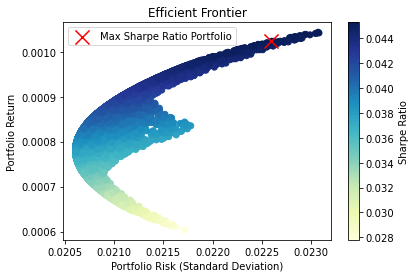

Max Sharpe Ratio Portfolio:
Return          0.001023
Risk            0.022599
Sharpe Ratio    0.045277
AAPL Weight     0.868145
Name: 503, dtype: float64


In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_tickers_and_weights():
    tickers = []
    weights = []

    while True:
        ticker = input("Enter a ticker (or '0' to finish): ")
        
        if ticker == '0':
            break
        
        weight = input("Enter the weight for {}: ".format(ticker))
        
        try:
            weight = float(weight)
            if weight < 0 or weight > 1:
                print("Weight must be between 0 and 1.")
            else:
                tickers.append(ticker)
                weights.append(weight)
        except ValueError:
            print("Invalid weight. Please enter a valid number between 0 and 1.")

    return tickers, weights

# Get tickers and weights from user input
tickers, weights = get_tickers_and_weights()

# Get historical price data for the portfolio
portfolio_data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns for the portfolio
returns = portfolio_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define the number of simulations
num_portfolios = 10000

results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    portfolio_weights = np.random.random(len(tickers))
    portfolio_weights /= sum(portfolio_weights)
    
    # Expected portfolio return
    portfolio_return = np.sum(mean_returns * portfolio_weights)
    
    # Expected portfolio volatility
    portfolio_stddev = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights)))
    
    # Sharpe ratio
    sharpe_ratio = portfolio_return / portfolio_stddev
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = sharpe_ratio
    results[3,i] = portfolio_weights[0]  # Weight of AAPL

# Create a DataFrame to store results
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio', 'AAPL Weight'])

# Find the portfolio with the highest Sharpe ratio (risk-adjusted return)
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

# Plot the efficient frontier
plt.scatter(results_df.Risk, results_df.Return, c=results_df['Sharpe Ratio'], cmap='YlGnBu')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], marker='x', color='r', s=200, label='Max Sharpe Ratio Portfolio')
plt.legend()
plt.show()

print("Max Sharpe Ratio Portfolio:")
print(max_sharpe_portfolio)


In [16]:
portfolio_data

,AAPL,GOOGL,MSFT,Rebalanced_Portfolio
Date,,,,
2019-12-31,71.615044,66.969498,152.274170,71.212486
2020-01-02,73.249031,68.433998,155.093674,72.831786
2020-01-03,72.536888,68.075996,153.162491,72.150331
2020-01-06,73.114868,69.890503,153.558365,72.835462
2020-01-07,72.771019,69.755501,152.158295,72.509710
...,...,...,...,...
2022-12-23,131.299820,89.230003,237.112091,127.654276
2022-12-27,129.477585,87.389999,235.354095,125.830501
2022-12-28,125.504539,86.019997,232.940552,122.083022


In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def get_tickers_and_weights():
    tickers = []
    weights = []

    while True:
        ticker = input("Enter a ticker (or '0' to finish): ")
        
        if ticker == '0':
            break
        
        weight = input("Enter the weight for {}: ".format(ticker))
        
        try:
            weight = float(weight)
            if weight < 0 or weight > 1:
                print("Weight must be between 0 and 1.")
            else:
                tickers.append(ticker)
                weights.append(weight)
        except ValueError:
            print("Invalid weight. Please enter a valid number between 0 and 1.")

    return tickers, weights

# Get tickers and weights from user input
tickers, weights = get_tickers_and_weights()

# Get historical price data for the portfolio
portfolio_data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns for the portfolio
returns = portfolio_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define the number of simulations
num_portfolios = 10000

results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    portfolio_weights = np.random.random(len(tickers))
    portfolio_weights /= sum(portfolio_weights)
    
    # Expected portfolio return
    portfolio_return = np.sum(mean_returns * portfolio_weights)
    
    # Expected portfolio volatility
    portfolio_stddev = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights)))
    
    # Sharpe ratio
    sharpe_ratio = portfolio_return / portfolio_stddev
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = sharpe_ratio
    results[3,i] = portfolio_weights[0]  # Weight of AAPL

# Create a DataFrame to store results
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio', 'AAPL Weight'])

# Find the portfolio with the highest Sharpe ratio (risk-adjusted return)
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

# Print the current portfolio characteristics
print("Current Portfolio Characteristics:")
print("Expected Return:", max_sharpe_portfolio['Return'])
print("Volatility (Risk):", max_sharpe_portfolio['Risk'])
print("Sharpe Ratio:", max_sharpe_portfolio['Sharpe Ratio'])

# Define target characteristics (You can adjust these based on your goals)
target_return = 0.10
target_risk = 0.20

# Optimization: Find the optimal asset weights to meet the target return and risk
def objective(weights):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_stddev  # Minimize the negative Sharpe ratio

# Constraint: The sum of weights must equal 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: Asset weights are between 0 and 1
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Initial guess (starting point for optimization)
initial_weights = [1.0 / len(tickers) for _ in range(len(tickers))]

# Perform optimization to find the optimal asset weights
optimized_weights = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints).x

# Rebalance the portfolio based on optimized weights
portfolio_data['Rebalanced_Portfolio'] = (portfolio_data.iloc[:, :].values.dot(optimized_weights))




[*********************100%***********************]  3 of 3 completed
Current Portfolio Characteristics:
Expected Return: 0.0010341913073990652
Volatility (Risk): 0.022839114954550377
Sharpe Ratio: 0.045281584223254547



Rebalanced Portfolio Characteristics:
Optimal Asset Weights: [9.13344448e-01 3.20923843e-17 8.66555521e-02]
Expected Return: 0.0010058330319417852
Volatility (Risk): 0.022521274847039058


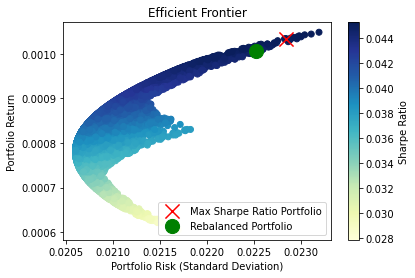

In [47]:
# Calculate the characteristics of the rebalanced portfolio
rebalanced_returns = portfolio_data['Rebalanced_Portfolio'].pct_change().dropna()
rebalanced_mean_return = rebalanced_returns.mean()
rebalanced_stddev = rebalanced_returns.std()

# Print the rebalanced portfolio characteristics
print("\nRebalanced Portfolio Characteristics:")
print("Optimal Asset Weights:", optimized_weights)
print("Expected Return:", rebalanced_mean_return)
print("Volatility (Risk):", rebalanced_stddev)

# Plot the efficient frontier
plt.scatter(results_df.Risk, results_df.Return, c=results_df['Sharpe Ratio'], cmap='YlGnBu')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], marker='x', color='r', s=200, label='Max Sharpe Ratio Portfolio')
plt.scatter(rebalanced_stddev, rebalanced_mean_return, marker='o', color='g', s=200, label='Rebalanced Portfolio')
plt.legend()
plt.show()

In [44]:
portfolio_data
optimized_weights
# portfolio_data.reset_index(inplace=True)
# portfolio_data = portfolio_data.iloc[:, 1:]
# portfolio_data

array([0.91334627, 0.        , 0.08665373])

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define a function to get tickers and weights from user input
def get_tickers_and_weights():
    tickers = []
    weights = []

    while True:
        ticker = input("Enter a ticker (or '0' to finish): ")
        
        if ticker == '0':
            break
        
        weight = input("Enter the weight for {}: ".format(ticker))
        
        try:
            weight = float(weight)
            if weight < 0 or weight > 1:
                print("Weight must be between 0 and 1.")
            else:
                tickers.append(ticker)
                weights.append(weight)
        except ValueError:
            print("Invalid weight. Please enter a valid number between 0 and 1.")

    return tickers, weights

# Get tickers and weights from user input
tickers, weights = get_tickers_and_weights()

# Get historical price data for the portfolio
portfolio_data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns for the portfolio
returns = portfolio_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define the number of simulations
num_portfolios = 10000

results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    portfolio_weights = np.random.random(len(tickers))
    portfolio_weights /= sum(portfolio_weights)
    
    # Expected portfolio return
    portfolio_return = np.sum(mean_returns * portfolio_weights)
    
    # Expected portfolio volatility
    portfolio_stddev = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights)))
    
    # Sharpe ratio
    sharpe_ratio = portfolio_return / portfolio_stddev
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = sharpe_ratio
    results[3,i] = portfolio_weights[0]  # Weight of the first ticker

# Create a DataFrame to store results
results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio', tickers[0] + ' Weight'])

# Find the portfolio with the highest Sharpe ratio (risk-adjusted return)
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

# Print the current portfolio characteristics
print("Current Portfolio Characteristics:")
print("Expected Return:", max_sharpe_portfolio['Return'])
print("Volatility (Risk):", max_sharpe_portfolio['Risk'])
print("Sharpe Ratio:", max_sharpe_portfolio['Sharpe Ratio'])
print(tickers[0] + ' Weight:', max_sharpe_portfolio[tickers[0] + ' Weight'])

# Define target characteristics (You can adjust these based on your goals)
target_return = 0.10
target_risk = 0.20

# Optimization: Find the optimal asset weights to meet the target return and risk
def objective(weights):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_stddev  # Minimize the negative Sharpe ratio

# Constraint: The sum of weights must equal 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: Asset weights are between 0 and 1
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Initial guess (starting point for optimization)
initial_weights = [1.0 / len(tickers) for _ in range(len(tickers))]

# Perform optimization to find the optimal asset weights
optimized_weights = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints).x



Invalid weight. Please enter a valid number between 0 and 1.
[*********************100%***********************]  2 of 2 completed
Current Portfolio Characteristics:
Expected Return: 0.0010337831003778984
Volatility (Risk): 0.022820155835695247
Sharpe Ratio: 0.04530131642487983
aapl Weight: 0.9145409695642728


KeyError: "None of [Index(['aapl', 'msft'], dtype='object')] are in the [columns]"

In [24]:
portfolio_data
# Rebalance the portfolio based on optimized weights
portfolio_data['Rebalanced_Portfolio'] = (portfolio_data[tickers] * optimized_weights).sum(axis=1)

# Calculate the characteristics of the rebalanced portfolio
rebalanced_returns = portfolio_data['Rebalanced_Portfolio'].pct_change().dropna()
rebalanced_mean_return = rebalanced_returns.mean()
rebalanced_stddev = rebalanced_returns.std()

# Print the rebalanced portfolio characteristics
print("\nRebalanced Portfolio Characteristics:")
print("Optimal Asset Weights:", optimized_weights)
print("Expected Return:", rebalanced_mean_return)
print("Volatility (Risk):", rebalanced_stddev)

# Plot the efficient frontier
plt.scatter(results_df.Risk, results_df.Return, c=results_df['Sharpe Ratio'], cmap='YlGnBu')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], marker='x', color='r', s=200, label='Max Sharpe Ratio Portfolio')
plt.scatter(rebalanced_stddev, rebalanced_mean_return, marker='o', color='g', s=200, label='Rebalanced Portfolio')
plt.legend()
plt.show()

KeyError: "None of [Index(['aapl', 'msft'], dtype='object')] are in the [columns]"

In [ ]:

# Rebalance the portfolio based on optimized weights
portfolio_data['Rebalanced_Portfolio'] = (portfolio_data[tickers] * optimized_weights).sum(axis=1)

# Calculate the characteristics of the rebalanced portfolio
rebalanced_returns = portfolio_data['Rebalanced_Portfolio'].pct_change().dropna()
rebalanced_mean_return = rebalanced_returns.mean()
rebalanced_stddev = rebalanced_returns.std()

# Print the rebalanced portfolio characteristics
print("\nRebalanced Portfolio Characteristics:")
print("Optimal Asset Weights:", optimized_weights)
print("Expected Return:", rebalanced_mean_return)
print("Volatility (Risk):", rebalanced_stddev)

# Plot the efficient frontier
plt.scatter(results_df.Risk, results_df.Return, c=results_df['Sharpe Ratio'], cmap='YlGnBu')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Risk'], max_sharpe_portfolio['Return'], marker='x', color='r', s=200, label='Max Sharpe Ratio Portfolio')
plt.scatter(rebalanced_stddev, rebalanced_mean_return, marker='o', color='g', s=200, label='Rebalanced Portfolio')
plt.legend()
plt.show()